In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mood_data.csv")
df.head()
print(df)

Saving mood_data.csv to mood_data.csv
                playlist_id playlist_owner  ... start_of_fade_out       mood
0    37i9dQZF1DXdPec7aLTmlC        Spotify  ...         179.33351      Happy
1    37i9dQZF1DWSqBruwoIXkA        Spotify  ...         207.52254        Sad
2    37i9dQZF1DXdPec7aLTmlC        Spotify  ...         167.56680      Happy
3    37i9dQZF1DWXLSRKeL7KwM        Spotify  ...         213.43782  Energetic
4    37i9dQZF1DXdPec7aLTmlC        Spotify  ...         211.66150      Happy
..                      ...            ...  ...               ...        ...
826  37i9dQZF1DWSf2RDTDayIx        Spotify  ...         153.60000      Happy
827  37i9dQZF1DWSf2RDTDayIx        Spotify  ...         212.45679      Happy
828  37i9dQZF1DWSf2RDTDayIx        Spotify  ...         175.08426      Happy
829  37i9dQZF1DWSf2RDTDayIx        Spotify  ...         183.84400      Happy
830  37i9dQZF1DWSf2RDTDayIx        Spotify  ...         192.82431      Happy

[831 rows x 25 columns]


In [9]:
X = df[[
        'acousticness',
        'danceability',
        'duration_ms',
        'energy',
        'instrumentalness',
        'key',
        'liveness',
        'loudness',
        'mode',
        'speechiness',
        'tempo',
        'time_signature',
        'valence',
        'key_confidence',
        'mode_confidence',
        'tempo_confidence',
        'time_signature_confidence',
        'end_of_fade_in',
        'start_of_fade_out'
        ]]
y = df['mood']

qt = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0).fit(X)
X = qt.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

c_values = []
g_values = []
accuracy_values = []
weight_values = []
kernel_values = []

for gamma in ["scale", "auto"]:
    for c in range(-4, 9):
        for kernel in ["linear", "poly", "rbf"]:
            for class_weight in [None, "balanced"]:
                clf = svm.SVC(C=2**c, gamma=gamma, class_weight=class_weight,kernel=kernel)
                clf.fit(X_train, y_train)
                y_pred=clf.predict(X_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)
                g_values.append(gamma)
                c_values.append(c)
                accuracy_values.append(accuracy)
                weight_values.append(class_weight)
                kernel_values.append(kernel)
                

# https://seaborn.pydata.org/generated/seaborn.scatterplot.html


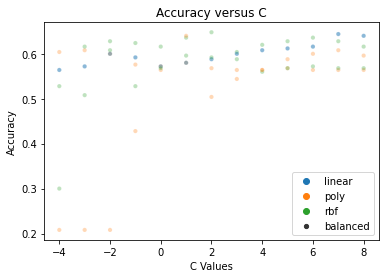

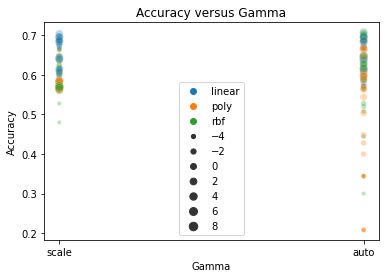

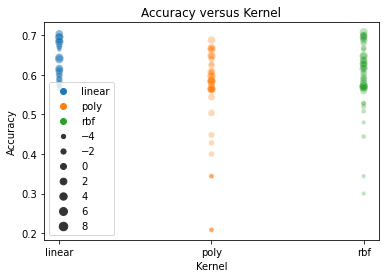

In [10]:
%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=c_values, y=accuracy_values, size=weight_values, hue=kernel_values, alpha=0.3)
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.title("Accuracy versus C")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=g_values, y=accuracy_values, size=c_values, hue=kernel_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Gamma")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=kernel_values, y=accuracy_values, size=c_values, hue=kernel_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Kernel")
plt.legend()
plt.show()

In [12]:
# Removing certain features.
X = df[['acousticness','danceability','energy','instrumentalness','key','loudness','mode','speechiness','tempo','time_signature','valence']]
y = df['mood']

qt = preprocessing.QuantileTransformer(n_quantiles=100, random_state=0).fit(X)
X = qt.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

c_values = []
g_values = []
accuracy_values = []
weight_values = []
kernel_values = []

for gamma in ["scale", "auto"]:
    for c in range(-4, 9):
        for kernel in ["linear", "poly", "rbf"]:
            for class_weight in [None, "balanced"]:
                clf = svm.SVC(C=2**c, gamma=gamma, class_weight=class_weight,kernel=kernel)
                clf.fit(X_train, y_train)
                y_pred=clf.predict(X_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)
                g_values.append(gamma)
                c_values.append(c)
                accuracy_values.append(accuracy)
                weight_values.append(class_weight)
                kernel_values.append(kernel)

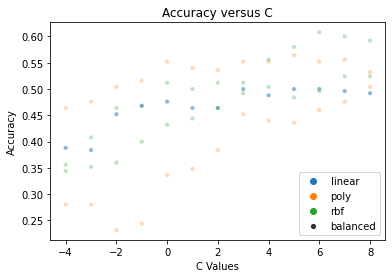

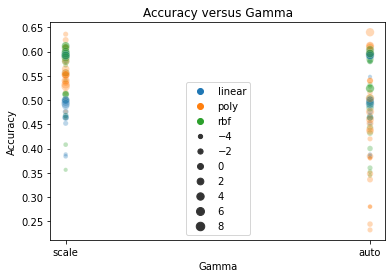

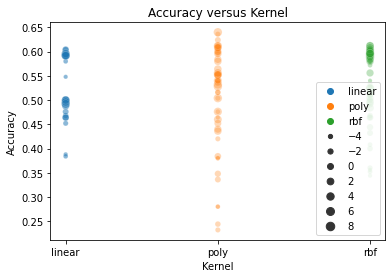

In [14]:
%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=c_values, y=accuracy_values, size=weight_values, hue=kernel_values, alpha=0.3)
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.title("Accuracy versus C")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=g_values, y=accuracy_values, size=c_values, hue=kernel_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Gamma")
plt.legend()
plt.show()

%matplotlib inline
# Creating a scatter plot
sns.scatterplot(x=kernel_values, y=accuracy_values, size=c_values, hue=kernel_values, alpha=0.3)
# Add labels to your graph
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title("Accuracy versus Kernel")
plt.legend()
plt.show()